In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("tech_sort1k.csv")
data.head()

,id,exact_matched_patt_contextual,summaries,Note
0,zsDSYc5UzpyXekOABZBfnQ_0000,NaN,senior director of clinical services housing a...,NaN
1,zs1YNrrCeorFkGLEXSSp-A_0000,NaN,i believe that passions are meant to be shared...,NaN
2,zowirq8ZhxhchApaRMhNSA_0000,NaN,bill bryant is founder and chairman of bryant ...,NaN
3,zoQVkPCfXB9n3AaPGHHwzg_0000,NaN,undertaking a trilingual masters degree in eur...,NaN
4,zmIr2glBZ3Ef8CSS0jw1og_0000,NaN,career objective a role within marketing and n...,NaN


In [3]:
data=data.drop(columns=["id","Note"])

In [4]:
len(data)

1001

In [5]:
data = data.dropna()

In [6]:
len(data)

291

In [7]:
data=data.reset_index(drop=True)

In [8]:
data

,exact_matched_patt_contextual,summaries
0,['republic'],i am a 19 year old entrepreneur and manager of...
1,['dell'],i am a self motivated professional with 13+ ye...
2,"['wordpress', 'joomla', 'drupal']",as owner and director of projects at metro inf...
3,['unity'],15+ years within the recruiting industry combi...
4,"['microsoft office', 'juniper', 'workday', 'py...","bachelor of science (b.s) degree in "" telecomm..."
5,"['sap erp', 'xero']","a high performing individual, demonstrating dr..."
6,['ey'],i am a management consultant specializing in f...
7,"['microsoft excel', 'microsoft word', 'accentu...",i am a first year full-time mba student at the...
8,['hike'],i am passionate about applying science to turn...
9,"['javascript', 'ios', 'google app engine', 'we...",currently building a beautiful mobile gps expe...


In [9]:
data['exact_matched_patt_contextual']=data['exact_matched_patt_contextual'].astype(str)

In [10]:
import nltk
import re
from bs4 import BeautifulSoup

nltk.download("punkt")

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mohitbagaria/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
data["to_match"]=data["exact_matched_patt_contextual"].apply(clean_text)

In [12]:
data.head(10)

,exact_matched_patt_contextual,summaries,to_match
0,['republic'],i am a 19 year old entrepreneur and manager of...,republic
1,['dell'],i am a self motivated professional with 13+ ye...,dell
2,"['wordpress', 'joomla', 'drupal']",as owner and director of projects at metro inf...,wordpress joomla drupal
3,['unity'],15+ years within the recruiting industry combi...,unity
4,"['microsoft office', 'juniper', 'workday', 'py...","bachelor of science (b.s) degree in "" telecomm...",microsoft office juniper workday python l...
5,"['sap erp', 'xero']","a high performing individual, demonstrating dr...",sap erp xero
6,['ey'],i am a management consultant specializing in f...,ey
7,"['microsoft excel', 'microsoft word', 'accentu...",i am a first year full-time mba student at the...,microsoft excel microsoft word accenture
8,['hike'],i am passionate about applying science to turn...,hike
9,"['javascript', 'ios', 'google app engine', 'we...",currently building a beautiful mobile gps expe...,javascript ios google app engine webgl


In [13]:
data["summaries"]=data["summaries"].apply(clean_text)

In [14]:
def convert(lst):
	return ' '.join(lst).split()

In [15]:
def givedata(tech_words,sentence):
    broken_list = convert([sentence])
    prev_tag="O"
    tech_words=convert([tech_words])
    tag_col=[]
    for word in broken_list:
        curr_tag="O"
        if word in tech_words:
            if (prev_tag=='B' or prev_tag=='I'):
                curr_tag='I'
            else:
                curr_tag='B'
        prev_tag=curr_tag
        tag_col.append(curr_tag)
    return pd.DataFrame(list(zip(broken_list, tag_col)),columns =['Word', 'Tag' ])

In [16]:
final_data=pd.DataFrame()

for i in range(0,len(data)):
#     print(i)
    temp = givedata(data["to_match"][i],data["summaries"][i])
    length = len(temp)
    wordd="Sentence :"+str(i+1)
    a=[wordd]*length
    temp.insert(0,"Sentence #",a)
    final_data = final_data.append(temp, ignore_index=True)
               

In [17]:
import seaborn as sns

/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


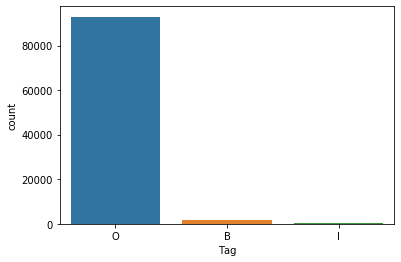

In [18]:
sns.countplot(final_data['Tag'])

In [19]:
final_data['Tag'].value_counts()

O    92918
B     1730
I      571
Name: Tag, dtype: int64

In [20]:
# final_data.loc[final_data['Tag']=='I']
final_data.loc[final_data['Tag'].isin(['I','B'])]

,Sentence #,Word,Tag
36,Sentence :1,republic,B
193,Sentence :1,republic,B
664,Sentence :2,dell,B
669,Sentence :2,dell,B
674,Sentence :2,dell,B
678,Sentence :2,dell,B
682,Sentence :2,dell,B
800,Sentence :3,joomla,B
801,Sentence :3,wordpress,I
802,Sentence :3,drupal,I


In [21]:
final_data.to_csv('TECH_bio_tagging_w_o_NULL.csv',index=False)

In [22]:
final_data.head()

,Sentence #,Word,Tag
0,Sentence :1,i,O
1,Sentence :1,am,O
2,Sentence :1,a,O
3,Sentence :1,19,O
4,Sentence :1,year,O


In [24]:
# final_data.groupby("Sentence #")

In [29]:
def givedata(tech_words,sentence):
    got_i=False
    broken_list = convert([sentence])
    prev_tag="O"
    tech_words=convert([tech_words])
    tag_col=[]
    for word in broken_list:
        curr_tag="O"
        if word in tech_words:
            if (prev_tag=='B' or prev_tag=='I'):
                curr_tag='I'
            else:
                curr_tag='B'
        prev_tag=curr_tag
        tag_col.append(curr_tag)
        if(curr_tag=='I'):
            got_i=True
    return pd.DataFrame(list(zip(broken_list, tag_col)),columns =['Word', 'Tag' ]),got_i

In [30]:
final_data1=pd.DataFrame()
for i in range(0,len(data)):
    temp,consider = givedata(data["to_match"][i],data["summaries"][i])
    print(consider)
    if consider==True:
        print("**")
        length = len(temp)
        wordd="Sentence :"+str(i+1)
        a=[wordd]*length
        ccc+=1
        temp.insert(0,"Sentence #",a)
        final_data1 = final_data1.append(temp, ignore_index=True)

False
False
True
**
False
True
**
True
**
False
True
**
False
True
**
False
False
False
True
**
False
False
True
**
False
False
False
False
True
**
False
True
**
True
**
True
**
True
**
False
False
False
False
False
False
False
False
False
True
**
False
True
**
True
**
False
True
**
True
**
False
False
True
**
False
False
False
False
False
False
False
False
True
**
False
True
**
False
False
False
False
True
**
False
False
False
True
**
False
True
**
False
True
**
False
True
**
True
**
True
**
True
**
False
True
**
False
True
**
True
**
True
**
True
**
False
False
False
False
True
**
True
**
False
False
False
True
**
True
**
True
**
False
True
**
True
**
False
False
True
**
False
True
**
False
True
**
False
True
**
True
**
False
True
**
True
**
False
False
False
False
True
**
False
True
**
True
**
False
False
True
**
False
False
False
False
False
False
False
False
False
True
**
False
True
**
False
False
True
**
True
**
True
**
True
**
False
True
**
False
False
False
False
False
False
Tr

In [31]:
final_data1

,Sentence #,Word,Tag
0,Sentence :1,as,O
1,Sentence :1,owner,O
2,Sentence :1,and,O
3,Sentence :1,director,O
4,Sentence :1,of,O
5,Sentence :1,projects,O
6,Sentence :1,at,O
7,Sentence :1,metro,O
8,Sentence :1,infodesign,O
9,Sentence :1,i,O


In [32]:
final_data1["Tag"].value_counts()

O    33541
B     1153
I      571
Name: Tag, dtype: int64

In [33]:
final_data1.to_csv("Tech_tagged_W_I.csv")

In [35]:
all_groups = final_data1.groupby("Sentence #")

list_grp = final_data1["Sentence #"].unique()

for i in list_grp:
    print(len(all_groups.get_group(i)))

In [42]:
data = pd.read_csv("/Users/mohitbagaria/Downloads/kaggle-ner/ner_dataset.csv",encoding="latin1")

In [43]:
data =data.fillna(method ="ffill")

In [44]:
all_groups = data.groupby("Sentence #")

list_grp = data["Sentence #"].unique()

for i in list_grp:
    print(len(all_groups.get_group(i)))
mohit
mo hit

24
30
14
15
25
24
21
28
15
25
12
34
29
26
40
10
22
34
20
24
23
29
25
32
14
23
19
19
25
7
29
22
25
26
35
30
21
34
10
21
27
19
35
29
24
24
26
10
9
23
22
38
39
14
17
20
24
31
22
9
15
7
24
34
8
41
26
34
32
21
7
17
14
29
21
30
38
22
14
24
30
20
18
25
11
17
20
21
29
14
28
24
20
27
7
34
12
32
25
32
13
16
18
13
28
9
18
18
20
12
26
10
28
32
22
20
26
21
11
34
27
14
15
24
14
34
26
18
19
23
21
24
28
13
23
22
23
18
23
38
26
15
24
25
33
25
20
36
19
9
16
20
27
4
36
24
40
32
18
21
24
11
17
11
17
28
21
15
26
14
20
17
25
28
7
21
22
10
12
20
6
10
28
17
21
41
25
19
35
23
23
17
25
18
20
27
25
18
21
28
30
20
6
31
17
30
18
27
25
15
24
11
25
26
40
17
26
30
30
29
21
22
30
21
15
14
15
22
12
22
20
27
17
27
30
26
28
24
8
21
21
15
15
27
30
34
20
18
17
13
23
10
12
14
12
6
15
29
29
32
30
30
28
15
7
11
28
15
21
32
22
24
17
16
22
16
27
26
23
22
23
23
14
24
21
17
10
26
38
29
16
23
17
11
20
11
29
19
31
22
25
20
16
26
18
22
18
15
21
22
27
31
23
25
17
20
32
23
24
29
14
26
15
21
15
29
19
12
15
19
16
12
30
27
30
46
22
23
14

22
17
17
17
28
28
7
13
12
22
31
17
9
11
22
22
19
8
9
31
26
24
20
12
12
16
49
24
15
13
13
23
36
15
33
13
20
22
20
8
30
27
27
14
25
11
16
10
26
39
23
31
16
16
23
10
20
15
14
16
13
20
18
14
21
31
22
28
27
20
35
16
17
26
23
21
15
25
27
15
16
25
24
15
10
5
13
18
9
13
25
8
22
17
21
14
16
24
25
31
30
12
12
26
23
17
21
27
10
12
5
23
14
20
12
23
22
16
8
12
9
21
13
28
29
16
30
18
23
23
25
20
20
21
16
15
29
29
27
25
41
19
31
22
20
18
22
23
24
22
15
13
19
7
8
22
31
18
10
31
19
24
27
23
30
38
16
26
32
26
9
26
13
24
38
33
17
20
23
31
24
23
9
9
17
13
9
14
19
32
21
24
26
23
22
22
21
16
18
8
26
22
10
20
31
24
32
14
40
29
38
15
22
18
35
34
15
16
30
24
42
26
20
27
19
20
25
27
23
31
20
21
14
21
13
23
11
18
60
41
40
28
25
44
34
30
40
29
23
24
26
24
15
37
21
24
11
12
21
24
13
17
9
18
34
13
11
25
19
17
18
28
15
20
35
31
33
28
44
19
28
33
16
23
17
21
30
22
9
36
16
16
21
12
14
14
23
19
23
31
32
16
20
28
26
41
14
24
27
26
16
18
14
16
21
22
27
31
20
9
12
21
28
26
20
13
25
30
31
30
19
28
15
9
16
29
13
31
18
19
19

22
13
16
15
30
34
23
11
22
17
34
24
25
20
35
29
34
8
31
12
18
22
28
36
17
26
47
25
30
14
18
17
19
23
25
25
20
17
26
25
24
26
16
31
13
21
29
35
19
16
23
26
24
30
24
23
17
25
28
21
29
18
30
24
16
28
25
9
28
39
31
17
31
15
18
24
23
12
20
25
16
12
25
23
26
31
20
31
18
24
13
25
12
28
20
11
22
28
30
19
16
17
26
37
26
14
18
26
22
24
23
32
26
32
16
33
22
14
20
26
22
39
15
11
13
15
35
26
26
21
28
17
19
15
12
30
21
31
30
27
23
3
28
18
30
35
30
28
19
31
27
27
16
27
22
17
14
24
23
22
26
22
23
37
29
14
37
13
13
13
24
11
17
24
21
26
31
20
21
22
12
30
7
21
28
31
15
25
20
12
9
25
25
37
12
20
18
28
15
12
30
17
26
15
22
15
16
25
19
20
28
23
22
21
17
20
21
22
12
14
8
15
25
28
18
8
9
24
8
10
8
23
23
24
9
18
19
30
18
18
30
23
31
26
42
37
13
11
14
27
25
12
43
16
32
29
30
27
24
36
31
23
30
21
28
25
23
60
17
29
18
22
19
23
10
30
27
13
25
33
14
18
29
9
23
21
22
21
18
41
29
21
20
19
9
29
27
19
32
31
31
13
22
18
9
22
31
28
20
14
26
37
10
13
18
24
9
17
26
15
24
21
17
24
19
18
25
23
15
26
32
28
18
22
24
20
25
20
2

10
25
32
17
26
13
39
34
15
20
50
24
18
12
14
21
14
17
32
28
30
28
11
19
5
37
10
29
20
47
28
23
20
26
21
11
17
24
27
20
13
10
21
13
25
7
9
19
13
14
15
14
11
16
13
21
16
29
38
23
38
20
21
15
8
15
26
25
28
20
15
12
17
34
21
5
17
6
24
24
12
31
29
21
8
19
30
27
17
22
5
35
10
7
10
7
27
19
35
23
22
22
27
26
20
13
16
13
29
17
28
38
29
15
34
34
15
21
30
23
28
19
23
11
15
24
12
22
27
27
41
16
25
18
11
33
19
20
14
24
27
22
15
21
25
27
12
26
23
21
27
23
20
36
13
8
8
10
10
15
9
16
23
24
31
26
13
17
33
30
35
26
35
26
16
6
23
35
8
24
18
28
18
22
17
7
29
20
31
17
21
35
15
31
12
18
19
24
20
16
21
25
26
28
9
25
7
19
17
24
20
20
16
18
30
26
29
39
26
13
29
8
20
16
11
26
15
15
21
13
14
27
39
33
25
18
25
16
17
34
10
31
20
24
11
18
21
35
23
23
26
36
16
22
23
20
17
7
14
23
30
25
22
13
24
27
16
37
28
13
19
33
19
20
18
10
11
35
32
17
26
26
9
16
27
31
12
31
26
20
19
17
15
11
25
36
14
32
25
14
25
15
11
21
32
19
21
13
28
20
35
29
25
36
25
33
32
22
9
26
48
26
38
26
28
13
29
20
40
28
30
26
20
21
17
22
28
29
16
17
19

12
18
11
24
33
11
15
21
24
35
27
27
19
19
30
23
27
25
21
16
19
20
27
19
20
24
7
23
34
29
34
25
24
28
20
18
19
16
20
25
18
14
16
27
13
23
12
35
22
30
10
34
20
34
19
17
19
22
18
30
16
18
11
25
32
15
25
32
21
32
28
12
15
24
10
28
25
7
5
6
12
13
24
37
15
19
25
29
18
35
28
22
24
22
14
12
10
21
19
8
30
27
21
10
30
17
22
22
21
18
16
16
18
13
12
10
21
9
9
26
12
15
18
19
27
20
9
28
21
21
30
15
12
21
18
33
10
23
9
11
18
9
21
17
34
25
8
20
19
17
24
21
6
18
13
16
33
27
23
22
18
24
14
22
40
25
24
25
29
25
11
29
35
27
24
16
25
23
19
25
12
33
25
29
31
9
13
21
24
20
27
13
34
20
26
28
18
17
29
35
20
35
16
8
22
20
20
12
12
22
21
26
17
19
21
25
44
21
35
21
20
10
26
22
25
36
15
29
26
13
29
8
15
23
34
29
19
25
28
16
20
13
19
19
15
24
22
17
31
32
21
20
31
26
25
27
31
33
19
32
30
22
26
12
28
29
23
13
24
15
32
32
30
34
23
18
20
32
34
39
33
16
20
20
24
19
32
14
29
15
16
28
17
6
25
29
35
17
30
21
30
11
37
19
28
8
19
9
29
12
24
11
21
20
9
26
19
27
19
24
37
25
18
8
23
30
28
18
14
32
13
14
36
24
24
17
6
24
18
22
1

35
26
34
26
20
31
43
8
20
22
11
22
17
24
29
17
13
24
30
40
35
39
26
29
16
21
25
24
30
22
21
21
31
12
16
30
30
25
18
28
15
14
32
26
24
29
21
13
19
18
22
23
19
18
26
23
30
10
31
22
26
14
15
12
12
16
21
24
18
29
29
11
23
14
24
35
33
25
25
21
13
5
21
24
11
14
36
14
10
11
14
34
14
35
18
31
17
24
10
19
26
14
28
25
22
34
19
9
16
34
24
37
25
22
20
31
19
48
13
10
22
19
26
28
18
10
15
27
24
39
15
18
17
20
22
39
32
13
19
16
25
20
25
18
12
21
13
27
18
39
21
17
14
22
27
14
23
22
31
18
12
31
20
33
31
28
25
22
27
18
13
18
8
22
35
7
22
9
37
18
24
18
19
26
36
37
33
46
50
20
18
29
13
26
13
19
34
13
34
22
30
17
26
22
40
39
29
20
34
33
33
13
22
18
18
40
38
13
25
14
34
10
17
34
17
15
28
11
15
17
24
10
15
20
35
13
20
36
14
19
23
18
27
34
12
9
22
12
9
29
23
29
26
17
23
21
33
29
24
24
20
24
22
29
12
28
14
8
29
24
23
18
17
28
16
20
25
20
20
27
10
20
29
18
14
22
21
22
29
9
13
20
13
26
24
26
13
18
25
13
15
18
18
16
19
22
17
42
23
17
13
21
22
13
21
27
25
18
23
11
10
22
35
27
24
19
14
12
17
21
11
23
16
20
28
21
14

29
21
14
25
13
16
21
24
13
24
21
18
25
17
23
16
7
16
37
14
29
15
14
32
15
28
17
23
21
39
19
20
35
21
16
20
24
27
35
14
18
15
25
18
30
13
17
14
20
23
13
12
18
19
24
30
31
22
26
15
28
18
17
16
35
23
30
31
22
20
21
21
19
15
34
21
29
25
8
25
22
22
11
27
19
19
32
18
11
17
13
30
30
40
25
21
17
32
23
19
20
21
13
18
29
16
32
16
27
22
26
33
14
11
13
38
14
29
34
20
23
18
11
25
24
16
18
24
8
14
23
22
26
9
31
19
17
18
14
32
32
25
17
32
25
20
24
6
27
30
30
25
16
7
30
28
28
19
12
34
27
40
31
16
27
28
30
30
29
25
27
34
31
21
11
33
35
19
20
16
23
18
28
33
28
25
25
27
28
30
26
23
23
23
16
30
24
18
16
33
31
20
24
32
17
18
27
22
10
16
29
12
33
29
39
31
24
25
27
10
29
9
28
20
28
27
25
15
19
16
13
24
28
17
21
12
9
19
23
43
12
22
43
32
25
22
40
17
23
12
44
33
18
22
13
14
19
55
31
41
10
37
35
33
33
35
43
12
20
18
19
20
31
33
26
25
34
11
29
29
14
26
36
13
23
32
11
19
3
39
20
30
11
24
21
30
17
28
29
12
24
9
15
8
20
35
27
27
24
20
21
17
34
35
41
28
23
30
18
16
12
17
30
32
27
17
12
18
19
13
6
24
18
25
22
30
25
1

20
17
16
24
25
37
29
29
22
20
10
19
15
17
7
19
15
12
22
17
21
16
27
18
19
14
35
25
13
18
18
10
24
29
27
15
18
27
13
22
22
22
19
21
22
16
37
18
13
21
24
46
32
29
18
25
29
30
23
23
18
7
25
7
17
14
7
21
19
15
26
24
19
9
14
19
11
19
8
15
16
18
15
20
32
37
14
25
23
17
12
18
26
9
17
6
12
16
29
32
14
13
21
17
25
25
29
23
26
22
29
29
33
24
19
10
16
40
17
17
19
15
22
28
20
23
9
16
19
11
18
27
20
17
29
11
13
17
22
27
26
35
24
25
18
23
12
40
31
16
27
9
29
17
12
12
22
10
13
21
18
20
27
51
42
25
23
31
14
14
28
18
34
30
26
18
18
20
31
20
32
26
25
25
34
14
19
21
15
18
30
17
20
18
23
13
16
13
27
32
15
12
14
19
22
27
38
31
10
20
25
28
20
22
16
14
22
9
29
26
18
11
25
15
12
8
26
28
11
19
16
25
19
12
22
12
20
16
19
24
20
20
21
18
34
47
32
11
19
21
10
26
23
55
33
30
22
11
24
27
26
25
12
18
14
28
12
36
9
15
17
26
10
21
15
7
29
23
15
27
19
22
23
21
17
14
20
13
25
17
22
22
25
13
20
29
21
18
22
25
33
22
19
33
36
29
13
17
34
13
34
26
15
20
14
12
17
29
23
17
21
11
18
20
11
10
21
16
17
12
20
12
41
14
35
25
70
32


28
35
33
15
13
31
25
17
23
7
28
18
25
34
29
23
16
24
23
27
28
16
31
31
32
26
16
23
25
17
30
19
19
26
14
20
17
16
17
15
19
24
39
22
36
28
13
28
23
34
30
19
20
23
28
39
24
33
10
11
25
22
27
16
24
13
13
10
26
26
24
23
31
28
36
33
14
33
26
15
20
26
15
16
9
19
20
27
39
25
15
27
36
23
17
25
18
18
32
52
10
24
11
20
24
15
12
34
30
34
13
20
21
40
11
21
20
30
20
11
3
17
13
20
25
17
16
18
20
25
21
16
28
14
26
19
19
11
28
10
16
23
20
13
11
21
33
12
25
31
43
24
22
20
29
16
19
10
25
16
17
35
22
38
22
22
15
31
25
37
20
29
10
24
33
16
21
15
21
20
34
15
26
20
36
31
28
19
21
18
30
16
14
30
20
17
21
13
26
21
7
41
32
15
9
23
25
22
28
21
11
21
23
32
7
9
8
27
14
18
22
18
17
22
24
30
12
16
17
39
13
25
22
25
13
17
15
27
20
30
19
26
32
22
15
19
30
17
30
9
40
24
8
21
22
21
13
13
10
18
10
15
16
28
22
24
31
17
21
21
26
21
24
28
20
15
15
34
23
15
10
6
24
11
24
12
25
30
26
11
27
26
30
13
16
44
26
20
28
22
31
12
21
5
22
18
27
13
31
16
22
25
12
25
19
14
14
18
25
16
25
19
16
17
23
15
21
8
11
27
15
10
27
19
36
25
28
31

17
34
25
29
23
10
19
23
24
18
17
12
26
29
8
43
11
23
31
17
27
28
18
19
10
18
27
24
9
15
18
20
26
31
21
17
7
23
13
26
21
32
12
27
22
17
42
15
12
23
32
16
9
29
16
26
14
37
14
37
18
23
23
17
15
35
28
9
19
32
43
35
39
19
19
20
21
16
37
31
16
26
15
41
13
31
23
27
35
34
22
34
31
26
20
26
58
12
6
14
10
21
18
14
18
22
19
10
19
12
29
22
39
38
35
24
20
22
16
27
17
19
12
11
12
18
16
18
38
31
20
26
34
27
25
24
24
14
25
11
13
23
17
10
24
11
21
24
31
25
4
34
36
11
14
12
39
30
33
12
22
26
27
24
34
24
24
12
30
25
27
14
9
10
30
16
21
30
17
10
34
34
14
15
24
32
19
23
10
18
22
24
30
17
12
17
8
5
16
12
17
10
33
17
16
36
26
5
23
22
19
19
15
21
25
20
13
14
22
26
33
13
6
22
15
18
15
23
25
17
21
32
22
13
29
28
24
35
17
10
10
23
27
14
10
22
24
14
20
16
24
23
17
17
10
5
20
18
21
18
23
11
13
27
22
18
26
25
12
14
28
28
29
21
28
25
13
18
19
12
31
13
35
30
19
16
14
37
30
40
14
28
18
5
14
19
11
24
33
15
10
26
21
24
23
16
19
21
15
15
12
18
18
27
22
21
18
28
10
25
25
18
23
36
25
19
20
22
11
17
20
23
23
26
12
17
25
32


23
22
16
22
22
21
14
20
38
35
14
16
23
20
19
20
15
18
23
15
13
9
8
20
22
12
20
26
13
31
45
22
31
25
18
11
35
22
30
26
29
25
24
19
17
4
8
28
6
16
27
18
17
7
15
13
27
11
30
13
13
19
15
10
31
20
13
21
27
22
30
18
21
19
21
29
18
23
13
18
33
21
16
28
12
34
26
32
17
23
14
22
26
31
32
23
14
25
23
27
27
22
9
18
13
18
18
23
17
27
13
21
31
14
8
23
16
24
29
34
30
27
10
20
21
8
16
22
25
28
35
13
14
34
27
15
19
8
15
17
12
18
23
23
25
24
25
35
23
24
23
26
23
18
19
26
18
24
18
37
25
27
14
25
22
18
16
30
13
16
19
18
17
23
11
9
14
22
15
24
24
29
31
18
17
28
21
16
41
26
25
26
25
23
15
26
17
20
20
30
8
19
25
9
18
24
15
25
17
30
35
13
27
24
27
31
19
26
22
17
20
12
24
11
21
29
14
6
18
28
24
27
13
11
15
23
46
25
25
14
18
8
13
25
29
22
39
10
17
19
44
30
10
11
21
20
19
8
27
23
21
19
25
33
29
10
27
16
25
21
11
15
23
25
21
23
20
16
23
24
22
22
20
22
31
21
22
27
27
24
23
16
14
18
38
15
42
20
8
6
21
17
20
34
21
38
28
28
20
23
28
22
12
13
22
16
17
31
24
17
14
5
28
23
21
29
9
8
13
16
18
29
25
23
20
20
9
37
34
40
15

18
12
8
24
25
33
33
11
32
16
23
27
31
19
29
22
26
23
20
20
29
39
34
31
10
29
36
11
21
17
20
10
10
25
25
9
22
20
16
23
23
28
11
21
27
23
16
26
20
19
20
23
23
17
20
10
37
26
5
6
19
18
33
8
28
16
13
19
14
15
19
19
35
29
26
17
15
13
24
22
19
11
24
14
16
36
14
22
12
13
30
11
31
19
14
29
10
25
23
20
12
19
10
19
10
11
31
21
20
25
26
23
31
13
27
29
18
22
25
28
15
20
26
18
21
26
23
19
15
28
20
24
15
32
14
24
11
26
30
30
18
18
21
23
20
17
21
15
22
16
26
26
38
26
33
28
33
28
17
43
24
9
23
21
22
16
22
28
25
20
30
16
18
17
17
15
26
7
25
19
19
24
26
24
54
18
22
16
25
21
24
20
12
34
16
31
23
10
15
24
31
37
24
15
21
19
28
25
10
25
25
31
19
30
21
39
30
28
13
23
24
26
22
7
13
11
10
21
13
15
19
31
12
27
26
13
39
23
29
19
11
21
18
43
19
30
27
14
14
14
13
15
19
35
22
32
24
6
17
45
21
18
9
19
8
23
28
24
31
22
26
19
13
24
28
13
12
33
23
27
25
16
17
15
8
12
19
23
12
13
14
22
27
27
33
9
46
27
11
13
14
62
7
16
25
25
18
30
12
33
20
23
32
23
18
54
15
33
18
23
31
16
27
18
28
27
22
21
29
11
21
15
24
17
42
17
13
37


28
28
40
7
33
31
28
31
21
14
18
11
21
44
26
22
30
33
28
24
18
19
14
19
25
20
27
24
25
23
15
16
21
19
29
9
14
17
38
25
33
20
17
17
28
13
29
16
19
33
9
22
33
23
22
35
13
6
24
10
31
8
35
23
24
16
10
25
33
35
14
27
21
26
23
14
24
23
25
22
11
33
44
36
23
26
26
17
23
24
29
32
24
20
16
22
23
20
26
32
20
19
34
16
16
13
16
18
25
17
25
25
22
18
14
19
11
29
25
20
23
13
35
33
23
19
20
19
24
12
10
15
11
14
16
7
26
17
27
28
14
20
34
16
37
37
19
26
22
16
32
24
21
18
25
8
18
5
15
16
19
15
15
20
15
12
10
20
22
20
15
28
23
33
15
24
29
38
20
18
26
21
18
16
25
30
32
20
13
17
18
43
14
31
28
13
16
25
16
24
15
45
22
32
22
29
24
17
14
19
13
15
23
31
19
11
19
22
20
23
17
13
5
21
19
18
25
24
14
19
19
18
19
11
21
28
18
23
14
18
33
17
22
36
30
29
36
26
29
30
29
24
30
29
19
24
10
28
19
28
15
23
20
18
10
25
30
13
21
19
21
36
23
23
25
24
16
10
2
9
27
17
41
19
20
7
31
33
13
21
45
22
20
25
9
19
28
13
36
20
8
14
14
8
41
13
34
15
18
41
16
13
9
35
17
17
5
32
15
26
13
16
31
21
18
16
15
14
27
17
28
27
25
28
18
19
23
16
28


23
16
24
33
37
26
40
27
19
25
28
26
23
15
24
29
12
19
15
23
24
39
13
19
14
19
15
23
14
20
36
15
31
15
14
11
18
2
26
16
25
21
19
31
30
29
8
12
23
16
26
32
32
25
31
12
26
25
25
28
34
26
19
29
27
26
23
19
29
31
23
19
18
22
16
14
23
22
26
17
25
26
21
21
8
29
26
35
30
25
27
20
22
18
23
28
40
32
36
15
24
15
23
32
20
23
27
19
30
26
13
41
13
21
17
14
14
27
6
21
10
15
16
18
19
16
20
24
17
17
18
24
22
30
6
23
22
14
11
9
15
20
21
19
18
19
10
10
25
19
17
28
34
42
22
19
29
20
37
7
31
23
9
16
16
14
22
31
32
5
36
22
12
25
13
10
20
20
10
17
15
16
33
19
15
23
29
36
12
21
18
14
32
12
32
12
16
18
31
20
35
31
25
34
25
18
21
19
49
11
24
22
12
8
13
34
33
23
19
28
23
19
21
27
15
24
19
37
30
32
24
21
23
27
31
26
17
31
5
27
20
32
19
26
24
21
9
20
26
32
17
25
31
21
20
15
20
16
21
16
16
14
9
15
21
24
18
22
12
16
21
23
27
18
16
25
33
16
21
19
9
17
33
24
20
27
32
31
27
17
13
29
24
31
17
37
25
18
15
27
27
28
25
8
16
14
10
6
19
21
22
7
27
15
28
20
73
19
32
19
33
31
27
22
21
11
32
7
21
20
5
18
21
25
13
6
23
20
24
19


8
21
17
13
14
14
14
31
43
14
33
22
14
16
12
18
21
14
22
19
15
10
8
24
10
28
12
15
16
30
13
20
24
33
13
27
28
21
23
15
23
30
15
23
13
28
20
19
12
27
16
25
20
21
15
31
31
18
23
11
17
19
13
19
19
18
13
42
21
37
30
38
16
20
22
17
17
30
17
18
6
21
25
32
14
15
34
23
19
34
17
25
21
29
23
15
15
10
19
27
15
26
18
24
31
12
30
15
14
15
8
14
26
24
16
23
5
30
23
27
28
24
12
20
35
8
14
20
20
31
35
23
23
20
16
9
28
35
27
19
9
22
11
28
21
29
23
22
19
31
45
28
28
13
12
23
53
35
11
18
29
13
29
10
11
28
10
16
17
9
28
11
14
6
16
25
24
34
28
42
14
26
27
31
19
25
13
40
18
26
32
15
6
15
17
28
20
28
31
11
15
17
12
20
22
27
25
16
11
18
25
17
6
23
19
16
28
9
19
11
23
27
25
28
37
37
20
41
36
24
29
27
10
20
21
24
11
31
26
12
8
10
26
28
24
22
17
34
21
29
21
34
21
14
20
30
16
24
4
18
16
12
11
24
20
29
25
20
23
22
20
26
17
15
16
24
20
29
14
10
13
9
9
19
9
9
13
36
40
33
23
26
25
7
8
15
25
32
21
20
25
13
25
21
14
19
28
15
23
12
27
20
18
22
15
11
22
22
18
28
12
17
18
11
17
19
12
16
32
29
18
14
18
18
19
22
14
34
39
14
1

16
16
10
26
26
32
17
26
15
19
32
19
14
21
22
27
15
22
18
25
10
42
30
34
30
15
23
22
16
24
19
17
16
11
20
17
22
16
19
24
17
35
15
25
33
16
10
18
21
13
5
35
42
30
16
22
26
16
17
12
40
21
21
6
22
28
22
26
27
21
17
12
11
23
9
22
18
25
22
12
10
22
28
29
25
32
37
26
18
14
32
17
28
16
21
36
27
23
29
21
13
23
20
14
46
32
23
23
7
21
9
19
18
22
20
14
23
17
16
11
27
22
24
19
17
11
20
22
28
13
30
9
16
20
29
18
22
20
12
14
31
29
18
16
17
27
24
19
32
24
23
16
17
21
25
24
21
18
15
13
11
29
20
7
17
31
23
29
19
20
17
30
20
14
24
24
20
13
10
11
20
18
28
12
21
25
25
25
30
17
19
19
21
17
21
12
19
31
19
24
34
23
25
20
25
15
25
14
25
19
19
31
13
26
29
23
24
24
21
26
22
20
14
20
25
36
27
32
11
40
7
26
25
33
26
16
18
21
18
34
22
23
12
17
22
20
24
12
23
33
21
38
14
23
20
21
15
30
22
24
8
29
24
16
21
19
30
24
14
36
22
23
18
22
22
21
28
11
19
23
19
21
17
30
31
17
16
12
17
15
34
17
12
27
16
30
19
21
28
20
18
17
34
29
40
30
12
21
30
6
32
30
32
21
17
34
35
28
7
17
16
18
30
40
19
27
36
22
26
26
24
25
16
20
26
19
22


In [ ]:
highly organized, creative, want to be involved in an inspiring project where i can utilize skill and creatively involved with system that effectively contributes to the growth of the project and putting a smile on my customers faces.

my work experience has provided me with the skills to take charge in all facets of planning and coordinating events, activities, tasks, contract negotiation and also use my creative skills to design any printed materials such as brochures, flyers and posters, ..., etc as per the event requirements. 

on the other hand, my administrative expertise allowed me to build on my skills in managing multiple task and being adaptable to unpredictable scenarios and challenges. i also possess considerable knowledge in working with computer software programs such as microsoft office and adobe.

i enjoy a demanding and variable work environments and am open to work on new and challenging tasks to enhance my knowledge and career., i have many years of experience as a communications specialist, my strength lies in my strong interpersonal, communication and creative support, leadership, computer and research competency, and the ability to work independently and with others from all levels of the organization. i am an ambitious and goal-oriented person, currently seeking an opportunity to implement gained skills and experience in your organisation. i have excellent communication skills, sharp organizational skills, attention to detail and excellent ability to work with speed and accuracy. i master creating plans, solutions and artwork when needed. i instinctively understand others' needs and a i possess a strong ability and desire to bring out the most in others. i put a high value on organization, productivity, and meeting deadlines., an account executive with a demonstrated history of working in the public relations and communications industry. skilled in creativity skills, arabic copywriting, media relations with a bachelor's degree focused in multimedia design from american university of sharjah., freelance graphic designer and event coordinator, communicator specialist / freelance designer